<a href="https://colab.research.google.com/github/elizangelacabral/MeuPrimeiroC-digo/blob/main/28jul_aula2_naodevs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Profissão: Cientista de Dados
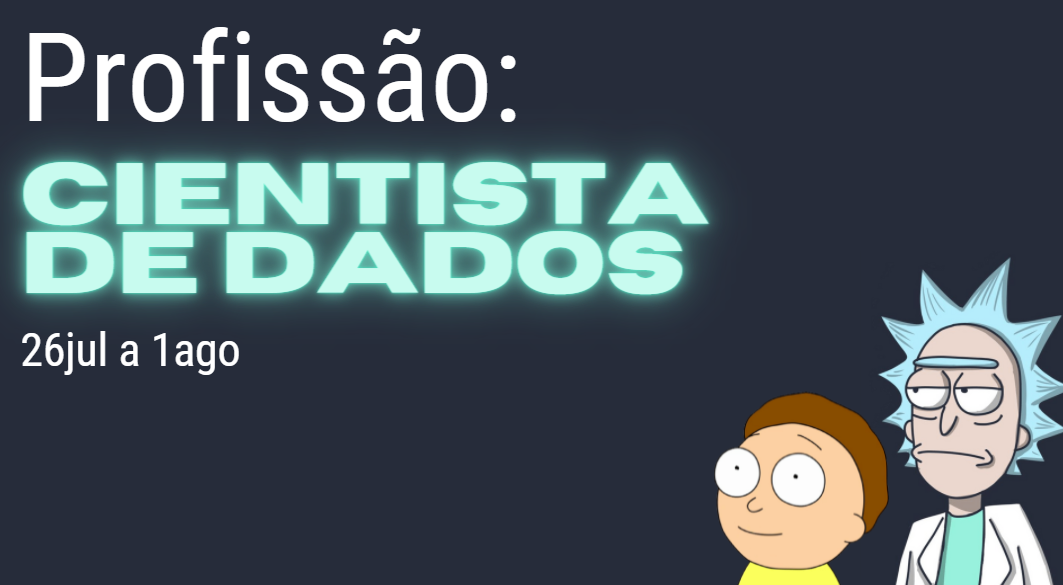
---

* Confirmação aula 3 para receber aviso: http://encurtador.com.br/deKY8
* Grupos para recebimento dos materiais extras como ebooks e materiais de aula: https://meugrupo.vip/c/2962


# Data Science Workflow

![](https://www.datascience-pm.com/wp-content/uploads/2020/10/harvard.png)

# COVID-19 DATA ANALYSIS
![](https://pbs.twimg.com/media/EWjM_DBWAAESbWc.jpg)

Etapas envolvidas na análise de dados:
1. Importando pacotes necessários
2. Coleta de dados
3. Transformando dados de acordo com nossas necessidades (Data Wrangling)
4. Análise Exploratória de Dados(EDA) e Visualização

## Importando pacotes

In [ ]:
# Importando pacotes
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## 2 Coleta de Dados

---




In [ ]:
# Coleta de dados ESRI
import requests

url_request = requests.get("https://services1.arcgis.com/0MSEUqKaxRlEPj5g/arcgis/rest/services/Coronavirus_2019_nCoV_Cases/FeatureServer/1/query?where=1%3D1&outFields=*&outSR=4326&f=json")
url_json = url_request.json()
df = pd.DataFrame(url_json['features'])

## Data Wrangling

---
Data Wrangling é um processo em que transformaremos e limparemos nossos dados de acordo com nossas necessidades. Não podemos analisar com nossos dados extraídos brutos. Portanto, temos que transformar os dados para prosseguir com nossa análise. Este é o código para nossa organização de dados:



In [ ]:
import datetime as dt

# a. transforming data

data_list = df['attributes'].tolist()
data = pd.DataFrame(data_list)
data.set_index('OBJECTID')
data = data[['Province_State','Country_Region','Last_Update','Lat','Long_','Confirmed','Recovered','Deaths','Active']]
data.columns = ('State','Country','Last Update','Lat','Long','Confirmed','Recovered','Deaths','Active')
data['State'].fillna(value = '', inplace = True)
data

In [ ]:
# b. cleaning data

def convert_time(t):
    t = int(t)
    return dt.datetime.fromtimestamp(t)

data = data.dropna(subset = ['Last Update'])
data['Last Update'] = data['Last Update']/1000
data['Last Update'] = data['Last Update'].apply(convert_time)
data

## Etapa 4: Análise Exploratória de Dados e Visualização de Dados 

Este processo é bastante longo, pois é o corw e a alma da análise de dados. Dividimos em:
1. Classificação de países e províncias (com base nos aspectos do COVID-19) 
2. Séries temporais em casos COVID-19 
3. Classificação e distribuição de casos


In [ ]:
# a. Top 10 confirmed countries (Bubble plot)

top10_confirmed = pd.DataFrame(data.groupby('Country')['Confirmed'].sum().nlargest(10).sort_values(ascending = False))

fig1 = px.scatter(top10_confirmed, x = top10_confirmed.index, y = 'Confirmed', size = 'Confirmed', size_max = 120,
                color = top10_confirmed.index, title = 'Top 10 Confirmed Cases Countries')
fig1.show()

In [ ]:
# b. Top 10 deaths countries (h-Bar plot)

top10_deaths = pd.DataFrame(data.groupby('Country')['Deaths'].sum().nlargest(10).sort_values(ascending = True))

fig2 = px.bar(top10_deaths, x = 'Deaths', y = top10_deaths.index, height = 600, color = 'Deaths', orientation = 'h',
            color_continuous_scale = ['deepskyblue','red'], title = 'Top 10 Death Cases Countries')
fig2.show()

In [ ]:
# c. Top 10 recovered countries (Bar plot)

top10_recovered = pd.DataFrame(data.groupby('Country')['Recovered'].sum().nlargest(10).sort_values(ascending = False))
fig3 = px.bar(top10_recovered, x = top10_recovered.index, y = 'Recovered', height = 600, color = 'Recovered',
             title = 'Top 10 Recovered Cases Countries', color_continuous_scale = px.colors.sequential.Viridis)
fig3.show()

In [ ]:
# d. Top 10 active countries

top10_active = pd.DataFrame(data.groupby('Country')['Active'].sum().nlargest(10).sort_values(ascending = True))
fig4 = px.bar(top10_active, x = 'Active', y = top10_active.index, height = 600, color = 'Active', orientation = 'h',
             color_continuous_scale = ['paleturquoise','blue'], title = 'Top 10 Active Cases Countries')
fig4.show()

In [ ]:
# Brazil
topstates_brazil = data['Country'] == 'Brazil'
topstates_brazil = data[topstates_brazil].nlargest(5, 'Confirmed')

fig6 = go.Figure(data = [
    go.Bar(name = 'Recuperados', x = topstates_brazil['State'], y = topstates_brazil['Recovered']),
    go.Bar(name = 'Ativos', x = topstates_brazil['State'], y = topstates_brazil['Active']),
    go.Bar(name = 'Mortos', x = topstates_brazil['State'], y = topstates_brazil['Deaths'])
])
fig6.update_layout(title = 'Most Affected States in Brazil', barmode = 'stack', height = 600)
fig6.show()

# COVID-19 Progresso de Vacinação

![](https://www.ubatuba.sp.gov.br/wp-content/uploads/sites/2/2021/04/Vacina%C3%A7%C3%A3o-67-770x416.jpeg)

Informações de nosso dataset:
*   Country - País da informção de vacina
*   Country ISO Code - código ISO do país
*   Date - data de entrada de dados. Para algumas das datas temos apenas as vacinações diárias, para outras, apenas o total (cumulativo)
*   Total number of vaccin ations - número absoluto do total de pessoas vacinadas no país
*   Total number of people vaccinated - uma pessoa, dependendo do esquema de imunização, receberá uma ou mais (normalmente 2) vacinas em um determinado momento, o número de vacinações pode ser maior que o número de pessoas.
*   Total number of people fully vaccinated - este é o número de pessoas que receberam todo o conjunto de imunização de acordo com o esquema de imunização (normalmente 2) em um determinado momento, pode haver um certo número de pessoas que receberam uma vacina e outro número (menor) de pessoas que recebeu todas as vacinas do esquema
*   Daily vaccinations (raw) - para uma determinada entrada de dados, o número de vacinação para essa data / país
*   Daily vaccinations - para uma determinada entrada de dados, o número de vacinação para essa data / país
*   Total vaccinations per hundred - proporção (em porcentagem) entre o número de vacinação e a população total até a data no país
*   Total number of people vaccinated per hundred - proporção (em porcentagem) entre a população imunizada e a população total até a data no país
*   Total number of people fully vaccinated per hundred - proporção (em porcentagem) entre a população totalmente imunizada e a população total até a data no país
*   Number of vaccinations per day - número de vacinação diária para aquele dia e país
*   Daily vaccinations per million - relação (em ppm) entre o número de vacinação e a população total para a data atual no país
*   Vaccines used in the country - número total de vacinas usadas no país (atualizado)
*   Source name - fonte da informação (autoridade nacional, organização internacional, organização local, etc.)
*   Source website - site da fonte de informação






## Análise de Dados
Inicializamos os pacotes Python que usaremos para ingestão, preparação e visualização de dados. Usaremos principalmente Plotly para visualização. Em seguida, lemos o arquivo de dados e agregamos os dados em alguns campos (country, iso_code e vaccines - ou seja, o esquema de vacinação usado em um determinado país).

Vamos olhar principalmente para:
*   Quais esquemas de vacinação são usados em vários países;
*   Número total de vacinações e porcentagem de vacinações;
*   Vacinações diárias e vacinações diárias por milhão;
*   Total de pessoas vacinadas e porcentagem de pessoas vacinadas;
*   No conjunto de dados também há informações sobre o número total de pessoas que estão completamente vacinadas (e a porcentagem delas).
*   Visualizamos os valores mais recentes (máximos) e também a variação no tempo dos valores acima mencionados.

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data_df = pd.read_csv("https://raw.githubusercontent.com/apenasweber/COVID-19-Vaccination-progress/master/country_vaccinations.csv")

In [ ]:
country_vaccine = data_df.groupby(["country", "iso_code", "vaccines"])['total_vaccinations', 
                                                                       'total_vaccinations_per_hundred',
                                                                      'daily_vaccinations',
                                                                      'daily_vaccinations_per_million',
                                                                      'people_vaccinated',
                                                                      'people_vaccinated_per_hundred',
                                                                       'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred'
                                                                      ].max().reset_index()

country_vaccine.columns = ["Country", "iso_code", "Vaccines", "Total vaccinations", "Percent", "Daily vaccinations", 
                           "Daily vaccinations per million", "People vaccinated", "People vaccinated per hundred",
                           'People fully vaccinated', 'People fully vaccinated percent']

## Quais vacinas são usadas em cada país?

In [ ]:
vaccines = country_vaccine.Vaccines.unique()
for v in vaccines:
    countries = country_vaccine.loc[country_vaccine.Vaccines==v, 'Country'].values
    print(f"Vaccines: {v}: \nCountries: {list(countries)}\n")

## Países


In [ ]:
data_df['iso_code'].value_counts()[:10]

# Variantes COVID-19
Uma das características mais perigosas do COVID-19 e de qualquer vírus é a capacidade de sofrer mutações com frequência. O curto tempo de reprodução, o fator R relativamente grande, a presença generalizada em quase todas as partes do mundo facilitou a aparição de múltiplas mutações. Especialmente aqueles com maior taxa de transmissão, colocam sob pressão elevada a resposta médica à pandemia COVID-19, mesmo após o início dos programas de vacinação.


In [ ]:
import numpy as np
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")
data_df = pd.read_csv("https://raw.githubusercontent.com/apenasweber/covid-19-variations-dataset/main/covid-variants.csv")

In [ ]:
print(f"Columns: data_df.shape[1]: {list(data_df.columns)}")
print(f"Rows: {data_df.shape[0]}")
print(data_df.info())

In [ ]:
data_df.head()

In [ ]:
print(f"Países: {data_df.location.nunique()}")
print(f"Data: {data_df.date.nunique()}")
print(f"Variantes: {data_df.variant.nunique()}")

In [ ]:
# DataViz

# Apresentação dos resultados


---

COVID-19 ameaçou o sistema de saúde e a integridade econômica de países em todo o mundo; países em desenvolvimento são significativamente afetados. Do lado positivo, as vacinas COVID-19 foram lançadas em muitos países. <br><br>Muitas populações marginalizadas e vulneráveis ​​em países de alta e baixa renda ainda estão esperando por sua primeira vacina. Se desmarcada, essa população corre o risco de ficar de fora do lançamento da vacina. Portanto, o objetivo foi analisar criticamente os dados de cobertura vacinal, identificar lacunas para informar a discussão e defesa de políticas, com foco em países de baixa e média renda. <br><br>No total, os resultados mostraram que a administração da vacina se concentra principalmente em países de alta renda. Algumas empresas de vacinas (por exemplo, Pfizer e BioNTech) estão fazendo um grande progresso na expansão de vacinas, embora geograficamente limitadas. <br><br>Países com maior PIB possuem investimento elevado em pesquisa científica, possibilitando o rápido acesso a criação e distribuição de vacinas.


## KAGGLE
https://www.kaggle.com/
---
![](https://minerandodados.com.br/wp-content/uploads/2018/03/kaggle-problem.png)
<br>Plataforma comprada pela Google para competições de Machine Learning(prêmios em dinheiro), repositório de datasets, Notebooks explicados e comunidade global.

# Machine Learning na prática

---

![](https://i.vas3k.ru/7vx.jpg)

# PROJETO IRIS<br>
## PROBLEMA A SER RESOLVIDO(BUSINESS UNDERSTANDING)
Automação de descoberta espécie de flor por imagem.<br>Pelo tamanho da pétala/sépala saber qual espécie da flor.<br>
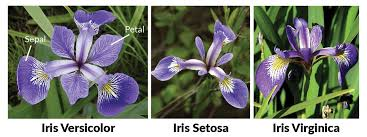

---


###Aplicação do mundo real:<br>
![](https://s2.glbimg.com/_Tl3a-ZiqfyMG9D69qzASDT28Ns=/0x0:695x595/984x0/smart/filters:strip_icc()/i.s3.glbimg.com/v1/AUTH_08fbf48bc0524877943fe86e43087e7a/internal_photos/bs/2019/A/f/828oWfSA2NgwbCNAdM4Q/como-usar-o-plantnet-1.jpg)
<br>
https://www.techtudo.com.br/dicas-e-tutoriais/2019/02/aplicativo-para-identificar-plantas-por-foto-veja-como-usar-o-plantnet.ghtml